# 교차 엔트로피 (Cross-Entropy)

**교차 엔트로피(Cross-Entropy)**는 정보 이론에서 유래한 개념으로, 머신러닝에서는 분류(Classification) 문제의 **손실 함수(Loss Function)**로 널리 사용됨. 이 함수는 모델이 예측한 확률 분포와 실제 정답의 확률 분포 사이의 차이를 측정함.

모델의 예측이 실제 정답과 가까울수록 교차 엔트로피 값은 작아지고, 예측이 틀릴수록 값이 커짐. 모델은 학습 과정에서 이 교차 엔트로피 값을 최소화하는 방향으로 파라미터를 업데이트함. 일반적으로 이진 분류에는 **시그모이드(Sigmoid)** 함수와 함께, 다중 클래스 분류에는 **소프트맥스(Softmax)** 함수와 함께 사용됨.

### 📐 수학적 배경

실제 확률 분포 P와 모델이 예측한 확률 분포 Q 사이의 교차 엔트로피 H(P, Q)는 다음과 같이 정의됨.

$$ H(P, Q) = -\sum_{x} P(x) \log(Q(x)) $$

#### 1. 이진 교차 엔트로피 (Binary Cross-Entropy)
클래스가 2개(0 또는 1)인 경우 사용. 실제 정답 레이블을 $y$, 모델이 클래스 1이라고 예측할 확률을 $\hat{y}$라고 할 때, 하나의 데이터 포인트에 대한 손실은 다음과 같음.

$$ \text{Loss} = - (y \log(\hat{y}) + (1-y) \log(1-\hat{y})) $$

* $y=1$ 이면, Loss = $-\log(\hat{y})$가 되어 모델이 1이라고 예측한 확률($\hat{y}$)이 1에 가까워질수록 손실이 0에 수렴함.
* $y=0$ 이면, Loss = $-\log(1-\hat{y})$가 되어 모델이 0이라고 예측한 확률($1-\hat{y}$)이 1에 가까워질수록 손실이 0에 수렴함.

#### 2. 범주형 교차 엔트로피 (Categorical Cross-Entropy)
3개 이상의 클래스를 분류할 때 사용. 실제 정답 레이블 $y$는 원-핫(one-hot) 벡터이고, $\hat{y}$는 소프트맥스 함수를 통과한 확률 벡터일 때, 하나의 데이터 포인트에 대한 손실은 다음과 같음. (K는 전체 클래스 개수)

$$ \text{Loss} = -\sum_{i=1}^{K} y_i \log(\hat{y}_i) $$

* $y$가 원-핫 벡터이므로(정답 클래스의 인덱스만 1이고 나머지는 0), 실제로는 정답 클래스 $c$에 해당하는 항만 살아남아 Loss = $-\log(\hat{y}_c)$ 로 단순화됨.

### 셋업 (Setup)
계산을 위한 라이브러리 임포트.

In [6]:
# !pip install numpy matplotlib
import numpy as np
import matplotlib.pyplot as plt

### 핵심 로직 구현 (Code Implementation)
이진 및 범주형 교차 엔트로피를 코드로 직접 구현하고, 예측이 좋을 때와 나쁠 때의 손실 값을 비교함.

#### 1. 이진 교차 엔트로피 (BCE) 예제

In [7]:
def binary_cross_entropy(y_true, y_pred):
    """하나의 데이터에 대한 이진 교차 엔트로피 손실을 계산함."""
    # log(0)을 방지하기 위해 매우 작은 값(epsilon)을 더해줌
    epsilon = 1e-9
    loss = -(y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon))
    return loss

# --- 시나리오 --- 
# 실제 정답은 1 (True)
y_true_binary = 1

# Case 1: 예측을 잘 한 경우 (1에 가까운 확률로 예측)
y_pred_good_b = 0.95
loss_good_b = binary_cross_entropy(y_true_binary, y_pred_good_b)
print(f"[BCE] 좋은 예측 (y_true={y_true_binary}, y_pred={y_pred_good_b}) -> Loss: {loss_good_b:.4f}")

# Case 2: 예측을 잘 못 한 경우 (0에 가까운 확률로 예측)
y_pred_bad_b = 0.05
loss_bad_b = binary_cross_entropy(y_true_binary, y_pred_bad_b)
print(f"[BCE] 나쁜 예측 (y_true={y_true_binary}, y_pred={y_pred_bad_b}) -> Loss: {loss_bad_b:.4f}")

[BCE] 좋은 예측 (y_true=1, y_pred=0.95) -> Loss: 0.0513
[BCE] 나쁜 예측 (y_true=1, y_pred=0.05) -> Loss: 2.9957


#### 2. 범주형 교차 엔트로피 (CCE) 예제

In [8]:
def categorical_cross_entropy(y_true, y_pred):
    """하나의 데이터에 대한 범주형 교차 엔트로피 손실을 계산함."""
    epsilon = 1e-9
    loss = -np.sum(y_true * np.log(y_pred + epsilon))
    return loss

# --- 시나리오 ---
# 3개 클래스 중 1번 클래스가 정답 (0-indexed)
y_true_categorical = np.array([0, 1, 0])

# Case 1: 예측을 잘 한 경우 (1번 클래스 확률을 높게 예측)
y_pred_good_c = np.array([0.05, 0.9, 0.05])
loss_good_c = categorical_cross_entropy(y_true_categorical, y_pred_good_c)
print(f"[CCE] 좋은 예측 (정답 클래스 확률={y_pred_good_c[1]}) -> Loss: {loss_good_c:.4f}")
# 참고: -np.log(0.9) = 0.1053

# Case 2: 예측을 잘 못 한 경우 (1번 클래스 확률을 낮게 예측)
y_pred_bad_c = np.array([0.8, 0.1, 0.1])
loss_bad_c = categorical_cross_entropy(y_true_categorical, y_pred_bad_c)
print(f"[CCE] 나쁜 예측 (정답 클래스 확률={y_pred_bad_c[1]}) -> Loss: {loss_bad_c:.4f}")
# 참고: -np.log(0.1) = 2.3025

[CCE] 좋은 예측 (정답 클래스 확률=0.9) -> Loss: 0.1054
[CCE] 나쁜 예측 (정답 클래스 확률=0.1) -> Loss: 2.3026


### 📊 결과 확인 및 시각화 (Results & Visualization)

교차 엔트로피의 핵심은 **$-\log(p)$** 그래프에 있음. 정답 클래스에 대한 예측 확률($p$)이 1에 가까워질수록 손실은 0에 수렴하고, 0에 가까워질수록 손실은 무한대로 발산함. 이는 모델이 자신 있게 틀리는 것을 매우 강하게 처벌(penalize)하는 효과를 낳음.

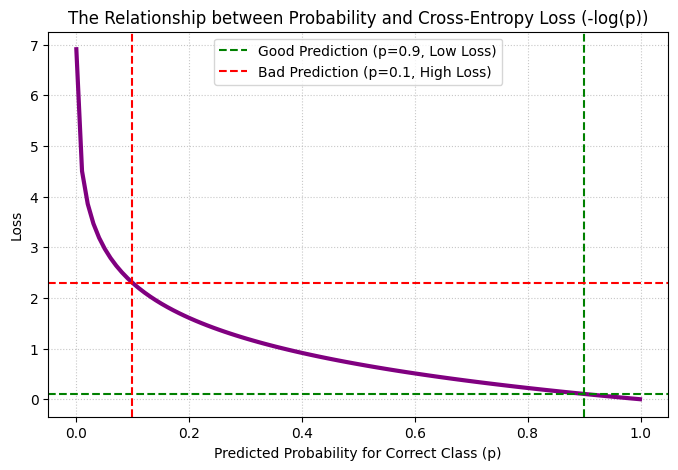

In [9]:
p = np.linspace(0.001, 0.999, 100)
loss = -np.log(p)

plt.figure(figsize=(8, 5))
plt.plot(p, loss, lw=3, color='purple')
plt.title('The Relationship between Probability and Cross-Entropy Loss (-log(p))')
plt.xlabel('Predicted Probability for Correct Class (p)')
plt.ylabel('Loss')

plt.axvline(0.9, color='green', linestyle='--', label='Good Prediction (p=0.9, Low Loss)')
plt.axhline(-np.log(0.9), color='green', linestyle='--')

plt.axvline(0.1, color='red', linestyle='--', label='Bad Prediction (p=0.1, High Loss)')
plt.axhline(-np.log(0.1), color='red', linestyle='--')

plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()

### 고려사항 (Considerations)

* **입력값**: 교차 엔트로피 손실 함수의 입력은 반드시 확률값이어야 함. 즉, 각 예측값은 0과 1 사이여야 하고, 다중 클래스의 경우 모든 클래스에 대한 예측 확률의 합이 1이어야 함. 이것이 시그모이드나 소프트맥스 함수가 필수적으로 사용되는 이유임.
* **수치 안정성**: 코드 구현 시 `log(0)`이 되는 것을 피하기 위해 아주 작은 값(epsilon)을 더해주는 것이 일반적임. 대부분의 딥러닝 프레임워크(TensorFlow, PyTorch)에서는 이런 안정성 처리가 내장된 함수를 제공함.

### 최종 요약 (Conclusion)

교차 엔트로피는 분류 모델의 예측이 실제 정답과 얼마나 다른지를 측정하는 효과적인 손실 함수임. 모델이 출력한 확률을 이용해 손실을 계산하며, 특히 정답에 대해 낮은 확률을 예측할 경우 매우 큰 페널티를 부과하여 학습을 올바른 방향으로 유도함.

이 노트북에서는 이진 및 범주형 교차 엔트로피의 개념과 수식을 알아보고, 코드로 직접 구현하여 예측의 정확도에 따라 손실 값이 어떻게 변하는지 확인함. $-log(p)$ 그래프 시각화를 통해 교차 엔트로피가 어떻게 동작하는지 직관적으로 이해할 수 있었음.